# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random as rn
import time

from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from platform import python_version_tuple
if python_version_tuple()[0] == '3':
    xrange = range
    izip = zip
    imap = map
else:
    from itertools import izip, imap

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


# Defining Variables

In [0]:
data_dir = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train'

num_classes = 10
channels = 3
img_size = 224

resnet50_pooling = 'avg'
resnet50_weight = 'imagenet'
dense_layer_activation = 'softmax'
objective_function = 'categorical_crossentropy'
loss_metrics = ['accuracy']

learning_rate = 0.0001
beta_1=0.9
beta_2=0.999
early_stop_patience = 3

num_epochs = 25
batch_size = 32
validation_split=0.25

# Preprocessing Dataset

In [3]:
datagen = ImageDataGenerator(rescale = None,
                            rotation_range = 30,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            validation_split=validation_split, #test split
                            preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
                            data_dir,
                            target_size=(img_size, img_size),
                            batch_size=batch_size,
                            shuffle = True,
                            class_mode='categorical',
                            subset='training')

validation_generator = datagen.flow_from_directory(
                            data_dir,
                            target_size=(img_size, img_size),
                            batch_size=batch_size,
                            shuffle = True,
                            class_mode='categorical',
                            subset='validation')

Found 3750 images belonging to 10 classes.
Found 1250 images belonging to 10 classes.


In [4]:
print('[PROCESSING...]')
start1 = time.process_time()
x1, y1 = izip(*(train_generator[i] for i in xrange(len(train_generator))))
x_train, y_train = np.vstack(x1), np.vstack(y1)
print('[COMPLETED]')
print('Time spent:', time.process_time() - start1)

[PROCESSING...]
[COMPLETED]
Time spent: 49.359790841000006


In [5]:
print(x_train.shape)
print(y_train.shape)

(3750, 224, 224, 3)
(3750, 10)


In [6]:
print('[PROCESSING...]')
start2 = time.process_time()
x2, y2 = izip(*(validation_generator[i] for i in xrange(len(validation_generator))))
x_test, y_test = np.vstack(x2), np.vstack(y2)
print('[COMPLETED]')
print('Time spent:', time.process_time() - start2)

[PROCESSING...]
[COMPLETED]
Time spent: 16.495542464999993


In [7]:
print(x_test.shape)
print(y_test.shape)

(1250, 224, 224, 3)
(1250, 10)


# Defining the Model

In [8]:
resnet50 = ResNet50(include_top = False, pooling = resnet50_pooling, weights = resnet50_weight, input_shape=(img_size, img_size, channels))

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
model = Sequential()
model.add(resnet50)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = dense_layer_activation))
model.layers[0].trainable = False

In [0]:
adam = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2)
model.compile(optimizer = adam, loss = objective_function, metrics = loss_metrics)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

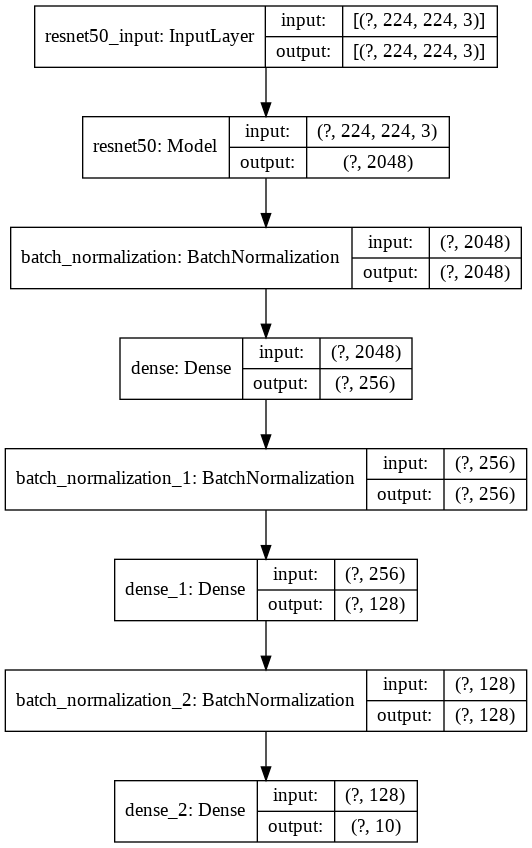

In [12]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

# Training the Model

In [14]:
print('[PROCESSING...]')
start3 = time.process_time()
fit_history = model.fit(
        x_train,
        y_train,
        steps_per_epoch=x_train.shape[0] // batch_size,
        epochs = num_epochs,
        validation_data = (x_test, y_test),
        verbose=1)
print('[COMPLETED]')
print('Time spent:', time.process_time() - start3)

[PROCESSING...]
Epoch 1/25
117/117 [==============================] - 40s 346ms/step - loss: 1.1578 - accuracy: 0.6313 - val_loss: 0.8821 - val_accuracy: 0.8440
Epoch 2/25
117/117 [==============================] - 37s 318ms/step - loss: 0.3373 - accuracy: 0.9150 - val_loss: 0.4295 - val_accuracy: 0.9264
Epoch 3/25
117/117 [==============================] - 37s 318ms/step - loss: 0.2069 - accuracy: 0.9592 - val_loss: 0.2795 - val_accuracy: 0.9440
Epoch 4/25
117/117 [==============================] - 37s 317ms/step - loss: 0.1363 - accuracy: 0.9774 - val_loss: 0.2266 - val_accuracy: 0.9488
Epoch 5/25
117/117 [==============================] - 37s 316ms/step - loss: 0.0970 - accuracy: 0.9852 - val_loss: 0.2011 - val_accuracy: 0.9544
Epoch 6/25
117/117 [==============================] - 37s 316ms/step - loss: 0.0761 - accuracy: 0.9912 - val_loss: 0.1802 - val_accuracy: 0.9536
Epoch 7/25
117/117 [==============================] - 37s 316ms/step - loss: 0.0581 - accuracy: 0.9940 - val_loss:

In [15]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)

118/118 - 26s - loss: 0.0014 - accuracy: 1.0000
40/40 - 8s - loss: 0.0864 - accuracy: 0.9744

Train accuracy: 1.0
Test accuracy: 0.974399983882904


# Visualization

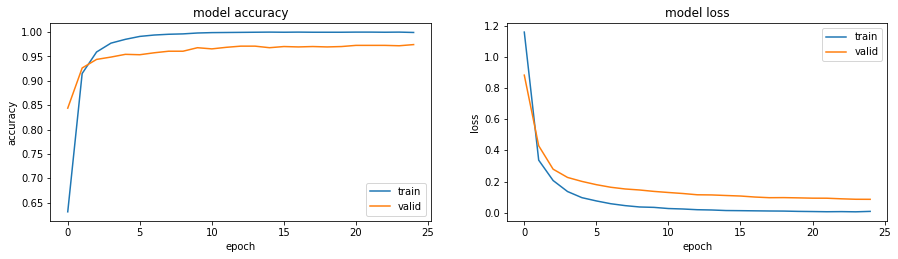

In [16]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       125
           1       0.98      0.98      0.98       125
           2       0.98      0.98      0.98       125
           3       0.97      0.99      0.98       125
           4       1.00      1.00      1.00       125
           5       0.98      1.00      0.99       125
           6       0.98      0.98      0.98       125
           7       0.97      0.98      0.98       125
           8       0.94      0.93      0.94       125
           9       0.95      0.93      0.94       125

    accuracy                           0.97      1250
   macro avg       0.97      0.97      0.97      1250
weighted avg       0.97      0.97      0.97      1250



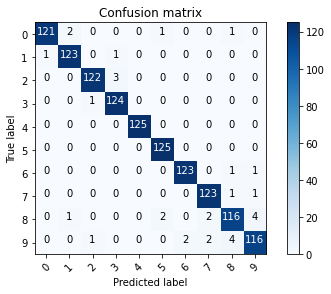

In [17]:
# Function to plot confusion matrix 
import itertools 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#classification report
print('Report : ')
print(classification_report(Y_true, Y_pred_classes))

# Experimenting

In [19]:
validation1_generator = datagen.flow_from_directory(
                                  data_dir,
                                  target_size=(img_size, img_size),
                                  batch_size=batch_size,
                                  shuffle = True,
                                  class_mode='categorical',
                                  subset='validation')

Found 1250 images belonging to 10 classes.


In [20]:
from tqdm import tqdm
print('[PROCESSING...]')
start2 = time.process_time()
a1, b1 = izip(*(validation1_generator[i] for i in xrange(len(validation1_generator))))
x_test1, y_test1 = np.vstack(a1), np.vstack(b1)
print('[COMPLETED]')
print('Time spent:', time.process_time() - start2)

0it [00:00, ?it/s]

[PROCESSING...]


TypeError: ignored

In [48]:
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing.image import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

result = model.predict(x)
np.argmax(result)
print(result)

Saving potato-earlyblight-test.JPG to potato-earlyblight-test.JPG
[[1.8702727e-03 3.7777447e-04 8.6268832e-05 1.7332938e-01 4.8639365e-03
  1.5693113e-02 8.0223584e-01 6.6840992e-05 1.0288565e-03 4.4765158e-04]]


In [29]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
class_names = ['1', '2', '3', '4', '5',
              '6', '7', '8', '9', '10']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

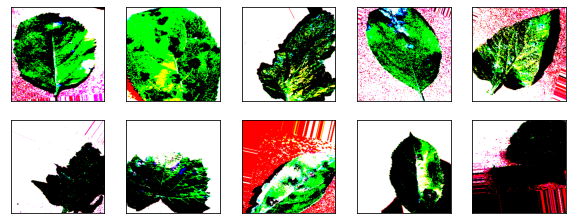

In [35]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    #plt.xlabel(class_names[y_train[i]])
plt.show()

In [39]:
import matplotlib.image as mpimg
for ima in x_train:
  img=mpimg.imread(ima)
  imgplot=plt.imshow(img)
  plt.show()

ValueError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


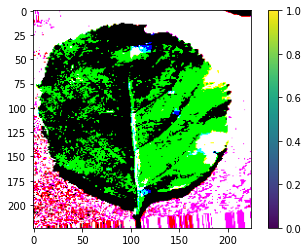

In [42]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
model.predict(y_train)

ValueError: ignored

In [49]:
%tensorboard --logdir='/content/logs'

UsageError: Line magic function `%tensorboard` not found.


In [0]:
test_dir = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)'

In [51]:
test_datagen = ImageDataGenerator(rescale= 1./255,
                                 preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')

Found 500 images belonging to 10 classes.


In [52]:
print('[PROCESSING...]')
start4 = time.process_time()
x4, y4 = izip(*(test_generator[i] for i in xrange(len(test_generator))))
x_testing, y_testing = np.vstack(x4), np.vstack(y4)
print('[COMPLETED]')
print('Time spent:', time.process_time() - start4)

[PROCESSING...]
[COMPLETED]
Time spent: 1.9084878799999956


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


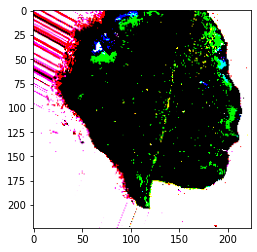

In [72]:
plt.figure()
plt.imshow(x_test[4])
plt.grid(False)
plt.show()

In [70]:
train_generator[0]

(array([[[[ 6.55891953e+01,  2.57491989e+01,  2.88481979e+01],
          [ 5.86995010e+01,  1.88595047e+01,  2.19585037e+01],
          [ 5.71510544e+01,  1.73110580e+01,  2.04100571e+01],
          ...,
          [ 5.31238022e+01,  1.52838058e+01,  2.83828049e+01],
          [ 5.56170731e+01,  1.77770767e+01,  3.08760757e+01],
          [ 5.80186996e+01,  2.01787033e+01,  3.32777023e+01]],
 
         [[ 6.94354782e+01,  2.95954819e+01,  3.26944809e+01],
          [ 6.09190292e+01,  2.10790329e+01,  2.41780319e+01],
          [ 5.78503799e+01,  1.80103836e+01,  2.11093826e+01],
          ...,
          [ 5.77622757e+01,  1.99222794e+01,  3.30212784e+01],
          [ 5.56251907e+01,  1.77851944e+01,  3.08841934e+01],
          [ 5.34881058e+01,  1.56481094e+01,  2.87471085e+01]],
 
         [[ 7.50385208e+01,  3.43201370e+01,  3.82975235e+01],
          [ 6.47653122e+01,  2.49253159e+01,  2.80243149e+01],
          [ 5.85497055e+01,  1.87097092e+01,  2.18087082e+01],
          ...,
    

ValueError: ignored

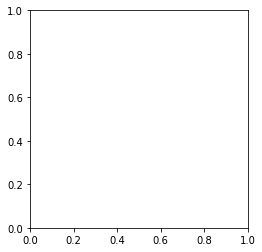

In [71]:
plt.figure()
plt.imshow(train_generator[4])
plt.colorbar()
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

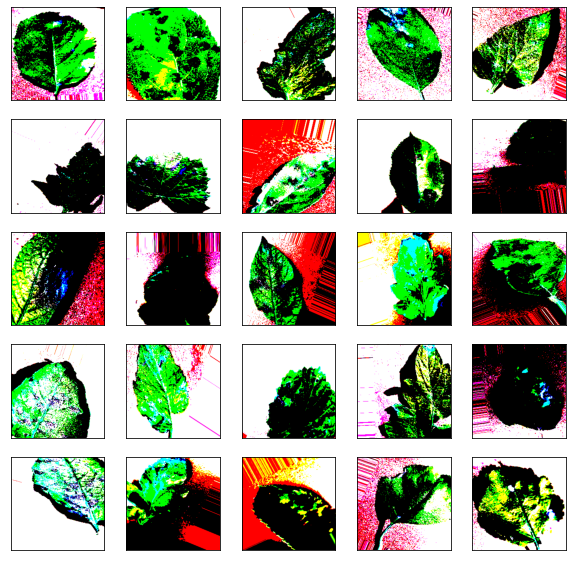

In [73]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [75]:
fit_history = model.fit(
        train_generator,
        steps_per_epoch=x_train.shape[0] // batch_size,
        epochs = 3,
        validation_data = (x_test, y_test),
        verbose=1)

Epoch 1/3
117/117 [==============================] - 67s 575ms/step - loss: 0.0607 - accuracy: 0.9806 - val_loss: 0.0695 - val_accuracy: 0.9792
Epoch 2/3
117/117 [==============================] - 68s 578ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0546 - val_accuracy: 0.9848
Epoch 3/3
117/117 [==============================] - 67s 574ms/step - loss: 0.0431 - accuracy: 0.9887 - val_loss: 0.0568 - val_accuracy: 0.9824


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


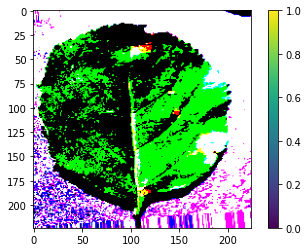

In [78]:
import cv2
plt.figure()
plt.imshow(cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


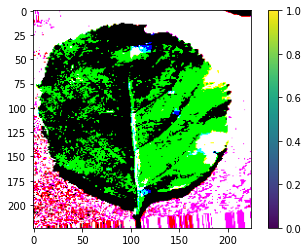

In [79]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


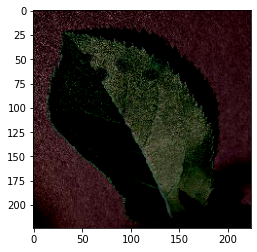

In [80]:
plt.figure()
plt.imshow(x_testing[0])
plt.grid(False)
plt.show()

In [0]:
x_testing = x_testing - 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


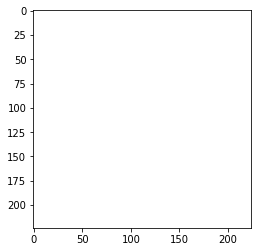

In [89]:
plt.figure()
plt.imshow(x_testing[0])
plt.grid(False)
plt.show()

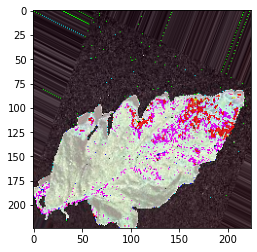

In [103]:
image = x_test[2]
plt.imshow(image.astype('uint8'))

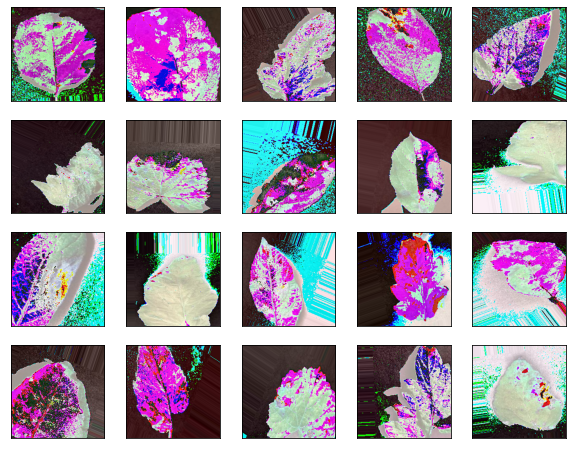

In [98]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].astype('uint8'))
    #plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
import os
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_grape_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Grape___Black_rot')
train_grape_names = os.listdir(train_grape_dir)
train_apple_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Apple___Black_rot')
train_apple_names = os.listdir(train_apple_dir)
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
grape_img_files = [os.path.join(train_grape_dir, f) for f in train_grape_names]
apple_img_files = [os.path.join(train_apple_dir, f) for f in train_apple_names]
img_path = random.choice(grape_img_files + apple_img_files)
 
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

In [106]:
x_test[2]

array([[[28.855553  , 13.015556  , 21.114555  ],
        [47.634666  , 31.79467   , 39.89367   ],
        [43.53071   , 27.690712  , 35.78971   ],
        ...,
        [38.54438   , 20.704384  , 28.803383  ],
        [23.508133  ,  5.6681366 , 13.767128  ],
        [50.71743   , 32.877434  , 40.976433  ]],

       [[20.476738  ,  4.6367416 , 12.735741  ],
        [ 7.2838135 , -8.556183  , -0.45718384],
        [28.71563   , 12.875633  , 20.974632  ],
        ...,
        [38.938026  , 21.09803   , 29.19703   ],
        [12.092743  , -5.7472534 ,  2.3517456 ],
        [77.87817   , 60.03817   , 68.13717   ]],

       [[56.528267  , 40.68827   , 48.78727   ],
        [48.01513   , 32.175133  , 40.27413   ],
        [20.655365  ,  4.8153687 , 12.914375  ],
        ...,
        [31.211983  , 13.371986  , 21.470985  ],
        [32.38758   , 14.547585  , 22.646584  ],
        [58.730446  , 40.89045   , 48.98945   ]],

       ...,

       [[46.750847  , 35.47413   , 39.79148   ],
        [58

In [0]:
x_test[2] = 255 - x_test[2]

In [0]:
x_test[0] = 255 - x_test[0]

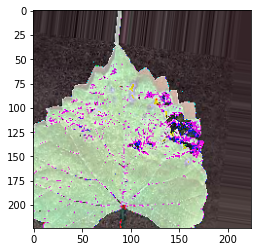

In [133]:
plt.imshow(x_test[0].astype('uint8'))

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt. grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [0]:
predictions = model.predict(x_test)

In [138]:
predictions[0]

array([1.6338998e-01, 5.4733824e-02, 4.8436546e-06, 1.2157720e-03,
       7.2452682e-01, 5.3464841e-02, 2.3162665e-08, 1.7412154e-07,
       2.7719767e-05, 2.6359383e-03], dtype=float32)

In [139]:
np.argmax(predictions[0])

4

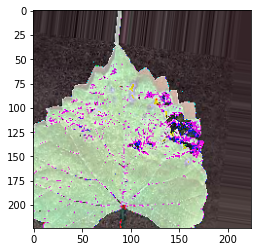

In [140]:
plt.imshow(x_test[0].astype('uint8'))

In [141]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [142]:
np.argmax(y_test[0])

3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: ignored

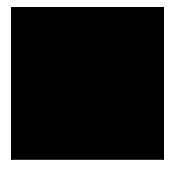

In [144]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

In [145]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Grape___Black_rot': 2,
 'Grape___Esca_(Black_Measles)': 3,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 4,
 'Potato___Early_blight': 5,
 'Potato___Late_blight': 6,
 'Tomato___Bacterial_spot': 7,
 'Tomato___Septoria_leaf_spot': 8,
 'Tomato___Target_Spot': 9}

In [148]:
model.evaluate_generator(generator=validation_generator,steps=10)

[0.05094145983457565, 0.984375]

In [170]:
# Function to plot confusion matrix 
import itertools 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict_generator(generator=validation_generator,steps=10)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(validation_generator.classes,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#classification report
print('Report : ')
print(classification_report(Y_true, Y_pred_classes))

AxisError: ignored

In [0]:
predictions = model.predict_generator(generator=validation_generator,steps=10)

In [0]:
y_true = validation_generator.classes

In [160]:
y_true

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [0]:
y_pred = predictions

In [164]:
mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), show_normed=False)

ValueError: ignored

In [165]:
validation_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Grape___Black_rot': 2,
 'Grape___Esca_(Black_Measles)': 3,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 4,
 'Potato___Early_blight': 5,
 'Potato___Late_blight': 6,
 'Tomato___Bacterial_spot': 7,
 'Tomato___Septoria_leaf_spot': 8,
 'Tomato___Target_Spot': 9}

In [0]:
predictions2 = model.predict_generator(generator=validation_generator,steps=10)

In [0]:
y_pred2 = np.rint(predictions2)

In [0]:
y_true2 = validation_generator.classes

In [177]:
print(confusion_matrix(y_true2, y_pred2))

ValueError: ignored

In [178]:
y_true2

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [179]:
Y_true

1125

In [180]:
Y_pred

array([[8.88013619e-06, 4.94510714e-05, 4.80962917e-05, ...,
        9.99564350e-01, 6.04233974e-05, 8.69460782e-05],
       [5.24602190e-04, 2.35139851e-05, 4.36613889e-04, ...,
        9.95828688e-01, 3.87620588e-04, 1.30649516e-03],
       [2.58481214e-06, 7.64546166e-06, 1.08548120e-05, ...,
        9.99746740e-01, 1.10191695e-05, 1.47945855e-06],
       ...,
       [2.99686399e-05, 1.26555364e-07, 1.59921854e-06, ...,
        3.07312002e-04, 6.11475727e-04, 4.27548821e-06],
       [2.24678843e-05, 7.06129285e-05, 1.05405583e-04, ...,
        4.42430464e-04, 1.21796853e-04, 9.97615695e-01],
       [3.42044374e-03, 9.95618224e-01, 4.79874871e-05, ...,
        2.35951084e-05, 1.33948161e-05, 3.11395452e-05]], dtype=float32)

In [182]:
np.argmax(Y_pred, axis=1)

array([7, 7, 7, 8, 8, 3, 9, 8, 6, 7, 5, 4, 1, 9, 2, 5, 7, 2, 0, 9, 3, 2,
       4, 8, 6, 2, 8, 6, 4, 8, 9, 0, 7, 4, 9, 5, 4, 8, 3, 0, 6, 8, 7, 6,
       7, 8, 9, 9, 5, 6, 2, 1, 2, 6, 0, 8, 2, 7, 2, 4, 7, 6, 6, 7, 7, 0,
       1, 0, 1, 5, 3, 0, 7, 4, 3, 8, 9, 5, 1, 3, 9, 0, 3, 1, 6, 3, 1, 6,
       5, 3, 2, 2, 3, 4, 7, 6, 2, 5, 3, 9, 2, 6, 8, 7, 4, 9, 3, 8, 1, 0,
       9, 2, 8, 8, 8, 3, 6, 6, 9, 6, 0, 0, 0, 6, 2, 1, 9, 3, 3, 8, 4, 6,
       2, 9, 8, 6, 7, 0, 4, 2, 1, 6, 6, 4, 3, 0, 1, 4, 7, 0, 0, 3, 1, 1,
       3, 6, 1, 1, 8, 8, 0, 7, 7, 9, 9, 7, 9, 6, 9, 2, 8, 9, 3, 0, 1, 8,
       7, 6, 8, 0, 1, 1, 4, 6, 5, 9, 1, 0, 9, 5, 5, 3, 2, 0, 2, 4, 5, 0,
       5, 3, 0, 2, 1, 1, 3, 2, 2, 4, 2, 3, 2, 5, 8, 0, 1, 5, 6, 1, 3, 9,
       1, 5, 9, 8, 0, 6, 2, 6, 1, 4, 2, 2, 3, 8, 6, 1, 5, 7, 9, 7, 4, 4,
       9, 3, 6, 8, 5, 4, 8, 2, 5, 9, 1, 5, 6, 5, 0, 3, 6, 8, 9, 1, 2, 3,
       1, 4, 2, 9, 8, 4, 8, 3, 0, 6, 9, 8, 6, 8, 1, 7, 8, 4, 3, 2, 2, 7,
       2, 2, 8, 8, 4, 4, 1, 2, 9, 6, 3, 4, 5, 5, 1,

In [187]:
np.argmax(y_test, axis=1)

array([3, 2, 8, ..., 1, 9, 7])